In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### &#11088; Visualisierung der Daten

### &#11088; Funktionen für die Visualisierung und Plotting

In [79]:
def Datensatz(CSVdatei):
    data = pd.read_csv(CSVdatei, delimiter= ";")
    return data
    

**Ringe** 

Die Funktion Ringe macht es, dass ein Datensatz eingelesen wird und dann ein Pie Chart ausgibt, welcher anzeigt welcher Ring am öftesten getroffen wurde.

In [80]:
def Ringe(Datensatz):
    try:
        Ring= Datensatz["Ringe"].value_counts()
    except: 
        print ("Dataframe ist kein Arrow Dataframe oder hat keine Spalte namens 'Ringe'")
    return Ring.plot.pie(figsize= (3,3), ylabel = "Treffer", xlabel = "",legend= True)

**Zielscheibe**

Die Funktion Zielscheibe macht es, dass ein Datensatz eingelesen wird und dann ein Scatterplot erstellt wird. 
Das besondere an der Funktion ist, dass der Plot auch anzeigt wo genau der Pfeil, in der Zielscheibe getroffen hat.

In [81]:
def Zielscheibe (Datensatz):
        if Datensatz["Typ Auflage"].max() == 122:

            Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 1, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Reds", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280)) 

            c11 = plt.Circle((0,0), 61, fill = False, color = 'yellow')           # Hier werden die Kreise erstellt, welche später dann in add_patch an den Plot eingesetzt werden  
            c12 = plt.Circle((0,0), 118, fill = False, color = 'red')
            c13 = plt.Circle((0,0), 162, fill = False, color = 'lightblue')
            c14 = plt.Circle((0,0), 217, fill = False, color = 'black')
            c15 = plt.Circle((0,0), 268, fill = False, color = 'black')

            for l in [c11, c12, c13, c14, c15]:
                Plot.add_patch(l)
        
        elif Datensatz["Typ Auflage"].max() == 40:

            Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 4,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Reds", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140)) 

            # Alternative wenn die Auflage kleiner ist

            c31 = plt.Circle((0,0), 21, fill = False, color = 'yellow')     # 10       
            c32 = plt.Circle((0,0), 41, fill = False, color = 'red')        # 9
            c33 = plt.Circle((0,0), 59, fill = False, color = 'lightblue')  # 8
            c34 = plt.Circle((0,0), 73, fill = False, color = 'black')      # 7
            c35 = plt.Circle((0,0), 91, fill = False, color = 'black')      # 6
            c36 = plt.Circle((0,0), 118, fill = False, color = 'black')     # 5
            c37 = plt.Circle((0,0), 137, fill = False, color = 'black')     # 4

            for l in [c31, c32, c33, c34, c35, c36, c37]:
                Plot.add_patch(l)
        
        else: print ("Der Datensatz erhält keine Standardwerte für Typauflage")
        return Plot


**Treffer vergleiche zur Passe**

Soll zeigen ob es eine Rolle spiel wie lange man schon spielt. Das macht die Funktion indem Sie Passe und Treffer in mehrere Graphen steckt kommt drauf an wie viele spiele man schon gespielt hat.
Dafür braucht er aber erst mal die durchschnittlichen Werte in einer Passe, da ansosnten der Graph hoch und runterspringen würde, da zum Beispiel in der ersten Passe 10 Punkte, aber auch 6 Punkte erzielt werden können. Das würde dazu führen, dass dort eine Linie zwischen 6 bis 10 auf der X-Koordinate: 1 entstehen würde.

Um dieses Problem zu lösen haben wir noch eine Funktion eingebaucht namen **averagePointinPasse()**

In [82]:
def averagePointinPasse(arrows):

    averageliste= []
    for l in range(1,20):
        average = arrows[arrows["Passe"] == l]

        sum = 0
        for i in average["Ringe"]:
            sum = sum + i

        average = sum/average["Ringe"].count()
        averageliste.append(average)
    series= pd.Series(averageliste)
    
    return pd.DataFrame({"Ringe": series.values})
        


In [83]:
def Trefferpassequote(a1= 0, a2= 0 , a3= 0 , a4= 0 ):

        Ringe1 = a1["Ringe"]

        Ringe2 = a2["Ringe"]

        Ringe3 = a3["Ringe"]

        Ringe4 = a4["Ringe"]

        fig, (ax, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (5,5), sharex= True,sharey= True)

        ax.plot(a1, color = "Black")
        ax2.plot(a2)
        ax3.plot(a3)
        ax4.plot(a4)
        ax4.set_xlabel("Passe")
        ax3.set_ylabel("durchschnittliche")
        ax2.set_ylabel("Punkte")
       


# &#11088; Einlesen der Daten und Plots

In [84]:
arrows1 = Datensatz("arrows1.csv")
arrows2 = Datensatz("arrows2.csv")
arrows3 = Datensatz("arrows3.csv")
arrows4 = Datensatz("arrows4.csv")

&#11088; Einsicht der Plots

In [ ]:
#Vergleich erster Datensatz
Ringe(arrows1)
Zielscheibe(arrows1)

In [ ]:
#Vergleich zweiter Datensatz
Ringe(arrows2)
Zielscheibe(arrows2)

In [ ]:
#Vergleich dritter Datensatz
Ringe(arrows3)
Zielscheibe(arrows3)

In [ ]:
#Vergleich vierter Datensatz
Ringe(arrows4)
Zielscheibe(arrows4)

C:\Users\gamer\AppData\Local\Temp\ipykernel_2828\4062857918.py:11: RuntimeWarning: invalid value encountered in scalar divide
  average = sum/average["Ringe"].count()


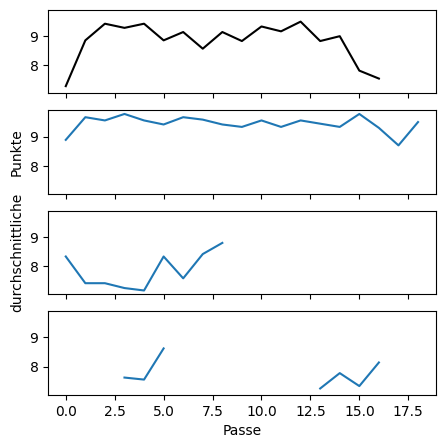

In [86]:
Trefferpassequote(averagePointinPasse(arrows1),averagePointinPasse(arrows2),averagePointinPasse(arrows3),averagePointinPasse(arrows4))

### &#11088; Interaktive Grafik

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

In [ ]:
def interaktiongrafik (Daten, Passe):